In [1]:
#import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [3]:
#read the data

In [8]:
data = pd.read_csv("datasets/Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [10]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [6]:
## feature scalaing

In [12]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [15]:
#train the data with SVR model

In [16]:
svr = SVR(kernel='rbf')
svr.fit(X,y)

C:\Users\SKUP\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [18]:
##predict the new data

#reverse the scaling

In [20]:
sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [21]:
#visualize SVR results

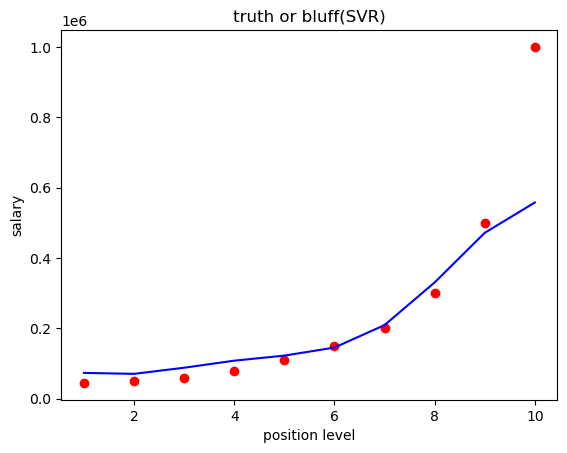

In [22]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X).reshape(-1,1)) ,color='blue')
plt.title("truth or bluff(SVR)")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

In [23]:
## visualize higher resolution

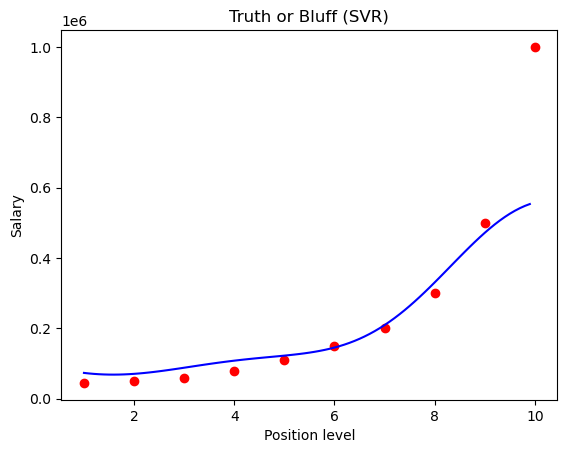

In [25]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')

plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_X.transform(X_grid)).reshape(-1,1)) , color = 'blue')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()